In [1]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing the DataSets**

In [4]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:09<00:00, 167MB/s]
100% 812M/812M [00:09<00:00, 85.8MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Extracting Data from the train set**

In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os

In [9]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.1904.jpg', 'dog.7028.jpg', 'cat.9112.jpg', 'dog.6059.jpg', 'dog.8146.jpg', 'cat.1673.jpg', 'cat.10517.jpg', 'cat.3210.jpg', 'dog.6950.jpg', 'dog.10543.jpg', 'cat.10380.jpg', 'dog.5150.jpg', 'cat.11294.jpg', 'dog.11476.jpg', 'dog.6244.jpg', 'cat.7006.jpg', 'cat.10772.jpg', 'dog.5441.jpg', 'dog.587.jpg', 'dog.8345.jpg', 'dog.10712.jpg', 'dog.1574.jpg', 'dog.7593.jpg', 'dog.4689.jpg', 'dog.3042.jpg', 'cat.11768.jpg', 'cat.6820.jpg', 'cat.1860.jpg', 'dog.2416.jpg', 'dog.4892.jpg', 'dog.11664.jpg', 'dog.7275.jpg', 'dog.3653.jpg', 'dog.9335.jpg', 'dog.9711.jpg', 'dog.423.jpg', 'cat.4713.jpg', 'dog.10376.jpg', 'cat.10064.jpg', 'dog.11219.jpg', 'cat.6138.jpg', 'cat.9068.jpg', 'cat.6466.jpg', 'dog.924.jpg', 'cat.10056.jpg', 'dog.4470.jpg', 'cat.3309.jpg', 'cat.6111.jpg', 'dog.3462.jpg', 'cat.3637.jpg', 'cat.6582.jpg', 'dog.6696.jpg', 'dog.932.jpg', 'dog.10480.jpg', 'cat.4934.jpg', 'dog.5205.jpg', 'dog.4545.jpg', 'dog.11175.jpg', 'cat.2962.jpg', 'cat.10760.jpg', 'dog.9492.jpg', 'dog.9831.j

**Importing the Libraries**

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

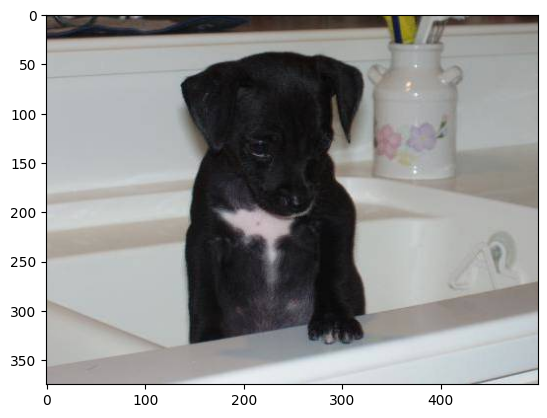

In [11]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

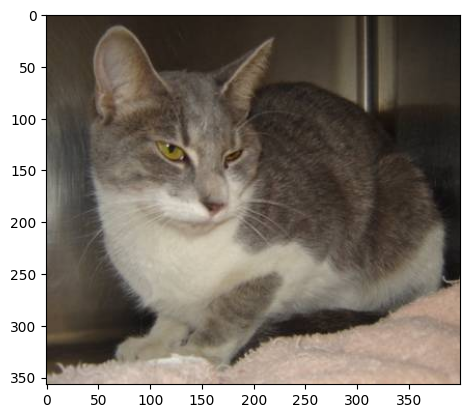

In [12]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [13]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
dog
cat
dog
dog


In [14]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [15]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [16]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

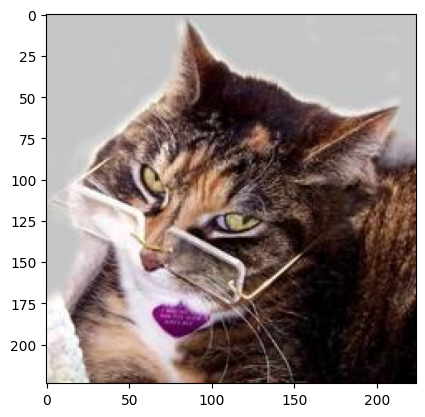

In [19]:
# display resized dog image
img = mpimg.imread('/content/image resized/cat.10035.jpg')
imgplt = plt.imshow(img)
plt.show()

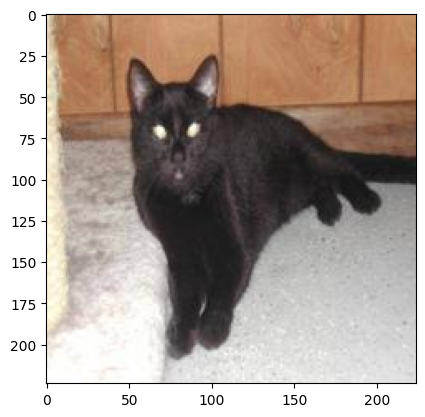

In [21]:
# display resized dog image
img = mpimg.imread('/content/image resized/cat.1007.jpg')
imgplt = plt.imshow(img)
plt.show()

Labeling the Images
1  ---> CAT
0  ---> DOG

In [22]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [23]:
print(filenames[0:5])
print(len(filenames))

['dog.1904.jpg', 'dog.7028.jpg', 'cat.9112.jpg', 'dog.6059.jpg', 'dog.8146.jpg']
2000


In [24]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 1, 1]
2000


In [25]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 992 1008]


In [26]:
import cv2
import glob

In [27]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [29]:
print(dog_cat_images)

[[[[234 222 188]
   [255 253 225]
   [230 226 207]
   ...
   [128 117 113]
   [192 168 162]
   [250 221 214]]

  [[239 227 193]
   [249 241 212]
   [225 221 202]
   ...
   [194 185 182]
   [156 136 131]
   [241 215 209]]

  [[255 246 214]
   [242 236 207]
   [199 198 178]
   ...
   [201 199 198]
   [162 150 146]
   [230 211 206]]

  ...

  [[ 26  50  26]
   [ 36  60  36]
   [ 38  61  39]
   ...
   [ 47  58  42]
   [ 49  59  43]
   [ 65  75  59]]

  [[ 39  65  42]
   [ 39  65  42]
   [ 33  56  34]
   ...
   [ 57  67  51]
   [ 50  60  44]
   [ 58  68  52]]

  [[ 29  55  32]
   [ 31  57  34]
   [ 43  66  44]
   ...
   [ 65  75  59]
   [ 45  55  39]
   [ 38  48  32]]]


 [[[228 207 229]
   [214 193 215]
   [201 181 200]
   ...
   [ 99  97 116]
   [ 95  94 114]
   [121 120 140]]

  [[170 149 171]
   [185 165 184]
   [146 126 145]
   ...
   [111 109 129]
   [102 101 121]
   [120 119 139]]

  [[162 142 161]
   [212 192 211]
   [147 127 146]
   ...
   [118 115 137]
   [104 102 124]
   [113 111

In [30]:
type(dog_cat_images)

numpy.ndarray

In [31]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [32]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Spliting

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [35]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [36]:
print(X_train_scaled.shape)


(1600, 224, 224, 3)


In [37]:
print(X_train_scaled)

[[[[0.18823529 0.23529412 0.24313725]
   [0.17254902 0.21960784 0.22745098]
   [0.15686275 0.2        0.21568627]
   ...
   [0.72156863 0.74901961 0.69019608]
   [0.7372549  0.76470588 0.70588235]
   [0.7254902  0.75294118 0.69411765]]

  [[0.17254902 0.21960784 0.22745098]
   [0.15686275 0.20392157 0.21176471]
   [0.14901961 0.19215686 0.20784314]
   ...
   [0.71764706 0.74509804 0.68627451]
   [0.72941176 0.75686275 0.69803922]
   [0.72156863 0.74901961 0.69019608]]

  [[0.14509804 0.19215686 0.2       ]
   [0.14117647 0.18823529 0.19607843]
   [0.14509804 0.18823529 0.20392157]
   ...
   [0.70588235 0.73333333 0.6745098 ]
   [0.72156863 0.74901961 0.69019608]
   [0.71764706 0.74509804 0.68627451]]

  ...

  [[0.65098039 0.63529412 0.54117647]
   [0.6627451  0.64705882 0.55294118]
   [0.66666667 0.64313725 0.55294118]
   ...
   [0.68627451 0.60392157 0.47843137]
   [0.70196078 0.61960784 0.49411765]
   [0.70980392 0.62745098 0.50196078]]

  [[0.64705882 0.63921569 0.54509804]
   [0.6

**Training the Model**

In [47]:
X_train_scaled_flattened = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_scaled_flattened = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

In [48]:
X_train_scaled_flattened.shape
X_test_scaled_flattened.shape

(400, 150528)

In [40]:
model = SVC()

In [41]:
model.fit(X_train_scaled_flattened,Y_train)

SVC()

**Model Evaluation on Training Samples**

In [42]:
X_train_prediction = model.predict(X_train_scaled_flattened)

Accuracy in Training:  0.898125


In [44]:
print("Accuracy in Training: ",accuracy_score(Y_train,X_train_prediction))
print("---------------------------------------------------")
print("Precision in Training: ",precision_score(Y_train,X_train_prediction))
print("---------------------------------------------------")
print("Recall in Training: ",recall_score(Y_train,X_train_prediction))
print("---------------------------------------------------")
print("F1 in Training: ",f1_score(Y_train,X_train_prediction))

Accuracy in Training:  0.898125
---------------------------------------------------
Precision in Training:  0.8695652173913043
---------------------------------------------------
Recall in Training:  0.9394313967861557
---------------------------------------------------
F1 in Training:  0.9031491384432561


**Confusion Matrix**

In [45]:
print(confusion_matrix(Y_train,X_train_prediction))

[[677 114]
 [ 49 760]]


**Model Evaluation on Testing Samples**

In [50]:
X_test_prediction = model.predict(X_test_scaled_flattened)

In [ ]:
print("Accuracy in Testing: ",accuracy_score(Y_test,X_test_prediction))
print("---------------------------------------------------")
print("Precision in Testing: ",precision_score(Y_test,X_test_prediction))
print("---------------------------------------------------")
print("Recall in Testing: ",recall_score(Y_test,X_test_prediction))
print("---------------------------------------------------")
print("F1 in Testing: ",f1_score(Y_test,X_test_prediction))

**Confusion Matrix on Testing**

In [ ]:
print(confusion_matrix(Y_test,X_test_prediction))